<a href="https://colab.research.google.com/github/olvad/ML_course_openEdu/blob/main/Homeworks/HW8_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 9
### Градиентный бустинг

В данном домашнем задании мы изучим применение градиентного бустинга для решения реальных задач.
  
Мы будем использовать данные об аренде квартир сервиса Яндекс.Недвижимость: по информации из объявления предсказывать время его экспозиции на сервисе.  

Метрикой качества для в данном задании является средняя абсолютная ошибка, MAE.

In [ ]:
! wget https://www.dropbox.com/s/psutl0zafq50828/data.tsv > ./data.tsv

--2024-07-19 16:21:57--  https://www.dropbox.com/s/psutl0zafq50828/data.tsv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/jvfejz7k8yvr3tobvh0v3/data.tsv?rlkey=qxju3flif8j5bql0gd9prqohg [following]
--2024-07-19 16:21:57--  https://www.dropbox.com/scl/fi/jvfejz7k8yvr3tobvh0v3/data.tsv?rlkey=qxju3flif8j5bql0gd9prqohg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8468ea6baa085e2821cfedd332.dl.dropboxusercontent.com/cd/0/inline/CXBMAqNwlra3ODWz1_vomq86if0TR0k9kQhmj356lboIfuQCFoM_9r9xJY78mcFjkmKibc91iXDpVHRVR0T53zcIxjg8hCWFrteBY0Aa5cqBqCnec-vl9TYqM9T4h4259oqgNamTxzW1rNYBU3L1yVQb/file# [following]
--2024-07-19 16:21:58--  https://uc8468ea6baa085e2821cfedd332.dl.dropboxusercontent.com/cd/0/inline/CXBMAqNwlra3O

In [ ]:
! pip install catboost==0.22
! pip install lightgbm==2.3.1

ERROR: Could not find a version that satisfies the requirement catboost==0.22 (from versions: 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.1, 1.1.1, 1.2, 1.2.1, 1.2.1.1, 1.2.2, 1.2.3, 1.2.5)
ERROR: No matching distribution found for catboost==0.22
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import catboost
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('data.tsv', sep='\t')
num_features = ['agent_fee', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'price', 'rooms_offered', 'total_area', 'total_images']
cat_features = ['balcony', 'building_type', 'month', 'renovation', 'studio']

X_train, X_test, y_train, y_test = train_test_split(data[num_features+cat_features], data['exposition_time'], test_size=0.3, shuffle=False)

__Задание 1.__

Обучите реализации градиентного бустинга LightGBM и Catboost на **вещественных** признаках без подбора параметров. Сделайте предсказания для тестовой выборки, посчитайте MAE. Выведите модуль разности между значениями метрик LightGBM и Catboost. Ответ округлите до тысячных.

В этом и последующих экспериментах советуем измерять время обучения моделей.

In [ ]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor(random_state=0)
model.fit(X_train[num_features], y_train)

Learning rate set to 0.094447
0:	learn: 82.6576920	total: 31.3ms	remaining: 31.2s
1:	learn: 82.3555500	total: 92.5ms	remaining: 46.2s
2:	learn: 82.1384973	total: 128ms	remaining: 42.5s
3:	learn: 81.9485328	total: 200ms	remaining: 49.7s
4:	learn: 81.7805486	total: 256ms	remaining: 50.9s
5:	learn: 81.6340937	total: 311ms	remaining: 51.6s
6:	learn: 81.5076144	total: 364ms	remaining: 51.7s
7:	learn: 81.3861081	total: 419ms	remaining: 52s
8:	learn: 81.2880186	total: 467ms	remaining: 51.4s
9:	learn: 81.1953539	total: 527ms	remaining: 52.1s
10:	learn: 81.1122810	total: 589ms	remaining: 52.9s
11:	learn: 81.0485132	total: 639ms	remaining: 52.6s
12:	learn: 81.0013380	total: 709ms	remaining: 53.9s
13:	learn: 80.9585160	total: 746ms	remaining: 52.5s
14:	learn: 80.9138877	total: 817ms	remaining: 53.6s
15:	learn: 80.8730709	total: 885ms	remaining: 54.4s
16:	learn: 80.8409736	total: 951ms	remaining: 55s
17:	learn: 80.8180634	total: 1.01s	remaining: 54.9s
18:	learn: 80.7884591	total: 1.08s	remaining: 

In [ ]:
%%time
from lightgbm import LGBMRegressor

train_data = LGBMRegressor(random_seed=0)
train_data.fit(X_train[num_features], y_train)



CPU times: user 4.42 s, sys: 50.3 ms, total: 4.47 s
Wall time: 3.98 s


LGBMRegressor(random_seed=0)

In [ ]:
from sklearn.metrics import mean_absolute_error

a = mean_absolute_error(model.predict(X_test[num_features]), y_test)

In [ ]:
b = mean_absolute_error(train_data.predict(X_test[num_features]), y_test)

In [ ]:

round(abs(a-b), 3)

0.195

__Задание 2.__

Подберите оптимальные параметры для Catboost на вещественных признаках,  используя все доступные комбинации из:

* глубины деревьев {5, 7, 9};
* темпа обучения {0.05, 0.1, 0.5}.

В качестве оптимизируемого функционала в алгоритме используйте MAE (loss_function='MAE'), random_seed=0, другие параметры оставьте без изменений.

Сделайте предсказания для тестовой выборки лучшей моделью, вычислите MAE.

In [ ]:
from catboost import CatBoostRegressor


model1 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5, learning_rate = 0.05 )
model1.fit(X_train[num_features], y_train)

0:	learn: 38.4413000	total: 172ms	remaining: 2m 51s
1:	learn: 38.1788965	total: 264ms	remaining: 2m 11s
2:	learn: 37.9416212	total: 337ms	remaining: 1m 52s
3:	learn: 37.7465473	total: 407ms	remaining: 1m 41s
4:	learn: 37.5500109	total: 491ms	remaining: 1m 37s
5:	learn: 37.3670545	total: 606ms	remaining: 1m 40s
6:	learn: 37.2014519	total: 705ms	remaining: 1m 40s
7:	learn: 37.0536189	total: 823ms	remaining: 1m 41s
8:	learn: 36.9089998	total: 918ms	remaining: 1m 41s
9:	learn: 36.7862015	total: 1.03s	remaining: 1m 41s
10:	learn: 36.6596869	total: 1.15s	remaining: 1m 43s
11:	learn: 36.5538598	total: 1.32s	remaining: 1m 48s
12:	learn: 36.4578544	total: 1.53s	remaining: 1m 55s
13:	learn: 36.3632721	total: 1.68s	remaining: 1m 58s
14:	learn: 36.2686930	total: 1.83s	remaining: 1m 59s
15:	learn: 36.1874072	total: 1.93s	remaining: 1m 58s
16:	learn: 36.1187329	total: 2.03s	remaining: 1m 57s
17:	learn: 36.0515674	total: 2.16s	remaining: 1m 57s
18:	learn: 35.9831472	total: 2.29s	remaining: 1m 58s
19:

In [ ]:
mean_absolute_error(model1.predict(X_train[num_features]), y_train)

34.57193663618056

In [ ]:
mean_absolute_error(model1.predict(X_test[num_features]), y_test)

31.644256433160564

----

In [ ]:
model2 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.1, verbose=0)
model2.fit(X_train[num_features], y_train)
mean_absolute_error(model2.predict(X_train[num_features]), y_train)

32.733415233397025

In [ ]:
mean_absolute_error(model2.predict(X_test[num_features]), y_test)

40.094100334245276

---

In [ ]:
model3 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.5, verbose=0)
model3.fit(X_train[num_features], y_train)
mean_absolute_error(model3.predict(X_train[num_features]), y_train)

32.22526130434381

In [ ]:
mean_absolute_error(model3.predict(X_test[num_features]), y_test)

40.729493330350586

----

In [ ]:
model4 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.05, verbose=0)
model4.fit(X_train[num_features], y_train)
mean_absolute_error(model4.predict(X_train[num_features]), y_train)

32.5093474370996

In [ ]:
mean_absolute_error(model4.predict(X_test[num_features]), y_test)

40.04941523286663

---

In [ ]:
model5 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.1, verbose=0)
model5.fit(X_train[num_features], y_train)
mean_absolute_error(model5.predict(X_train[num_features]), y_train)

32.17480394443154

In [ ]:
mean_absolute_error(model5.predict(X_test[num_features]), y_test)

40.115849678171216

----

In [ ]:
model6 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.5, verbose=0)
model6.fit(X_train[num_features], y_train)
mean_absolute_error(model6.predict(X_train[num_features]), y_train)

31.388770249169387

In [ ]:
mean_absolute_error(model6.predict(X_test[num_features]), y_test)

40.89647092028823

---

In [ ]:
model7 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.05, verbose=0)
model7.fit(X_train[num_features], y_train)
mean_absolute_error(model7.predict(X_train[num_features]), y_train)

31.78476559639363

In [ ]:
mean_absolute_error(model7.predict(X_test[num_features]), y_test)

40.326054423403555

---

In [ ]:
model8 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.1, verbose=0)
model8.fit(X_train[num_features], y_train)
mean_absolute_error(model8.predict(X_train[num_features]), y_train)

31.239748416657758

In [ ]:
mean_absolute_error(model8.predict(X_test[num_features]), y_test)

40.46045650048674

----

In [ ]:
model9 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.5, verbose=0)
model9.fit(X_train[num_features], y_train)
mean_absolute_error(model9.predict(X_train[num_features]), y_train)

30.033209660477524

In [ ]:
mean_absolute_error(model9.predict(X_test[num_features]), y_test)

42.40708964519367

---

__Задание 3.__

Пока что мы использовали только вещественные данные, однако категориальные переменные также могут быть полезны для решения задачи. Перебирая комбинации параметров из предыдущего пункта, используйте все доступные признаки, обрабатывая категориальные встроенным методом Catboost.

Выведите значение MAE на тестовой выборке для лучшей модели.

In [ ]:
for feature in cat_features:
    X_train[feature] = X_train[feature].astype(str)
    X_test[feature] = X_test[feature].astype(str)

In [ ]:
model31 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.05, verbose=0, cat_features = cat_features )
model31.fit(X_train, y_train)
mean_absolute_error(model31.predict(X_train), y_train)

32.282008410479946

In [ ]:
mean_absolute_error(model31.predict(X_test), y_test)

32.405049311496875

In [ ]:
model32 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.1, verbose=0, cat_features = cat_features )
model32.fit(X_train, y_train)
print(mean_absolute_error(model32.predict(X_train), y_train), '\n',
      mean_absolute_error(model32.predict(X_test), y_test))

32.11588324550155 
 31.741487095542944


In [ ]:
model33 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.5, verbose=0, cat_features = cat_features )
model33.fit(X_train, y_train)
print(mean_absolute_error(model33.predict(X_train), y_train), '\n',
      mean_absolute_error(model33.predict(X_test), y_test))

31.665148095780726 
 41.20001896614444


In [ ]:
model34 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.05, verbose=0, cat_features = cat_features )
model34.fit(X_train, y_train)
print(mean_absolute_error(model34.predict(X_train), y_train), '\n',
      mean_absolute_error(model34.predict(X_test), y_test))

31.748144341863195 
 33.329748642525686


In [ ]:
model35 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.1, verbose=0, cat_features = cat_features )
model35.fit(X_train, y_train)
print(mean_absolute_error(model35.predict(X_train), y_train), '\n',
      mean_absolute_error(model35.predict(X_test), y_test))

31.551381610781686 
 46.84258079404832


In [ ]:
model36 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 7,
                           learning_rate = 0.5, verbose=0, cat_features = cat_features )
model36.fit(X_train, y_train)
print(mean_absolute_error(model36.predict(X_train), y_train), '\n',
      mean_absolute_error(model36.predict(X_test), y_test))

31.00450950894092 
 42.69814306622918


In [ ]:
model37 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.05, verbose=0, cat_features = cat_features )
model37.fit(X_train, y_train)
print(mean_absolute_error(model37.predict(X_train), y_train), '\n',
      mean_absolute_error(model37.predict(X_test), y_test))

31.23000417077831 
 34.73325792896148


In [ ]:
model38 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.1, verbose=0, cat_features = cat_features )
model38.fit(X_train, y_train)
print(mean_absolute_error(model38.predict(X_train), y_train), '\n',
      mean_absolute_error(model38.predict(X_test), y_test))

30.831535805927217 
 35.25572984522925


In [ ]:
model39 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 9,
                           learning_rate = 0.5, verbose=0, cat_features = cat_features )
model39.fit(X_train, y_train)
print(mean_absolute_error(model39.predict(X_train), y_train), '\n',
      mean_absolute_error(model39.predict(X_test), y_test))

29.913906696713056 
 45.265356702300224


__Задание 4.__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) полученных в заданиях 2 и 3 моделей и выведите MAE на тестовой выборке.

Обратите внимание: в этом задании нет ограничений на веса у моделей.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LinearRegression
import numpy as np

preds1 = model1.predict(X_train[num_features])
preds2 = model32.predict(X_train)


preds_matrix = np.vstack([preds1, preds2]).T

In [ ]:
preds_matrix

array([[20.52342592, 20.2744891 ],
       [55.35043987, 53.48715309],
       [22.96400978, 29.19408936],
       ...,
       [ 5.54401197, 88.33778195],
       [20.31996021, 23.2776289 ],
       [55.85265566, 68.11658922]])

In [ ]:
blender = LinearRegression()
blender.fit(preds_matrix, y_train)


LinearRegression()

In [ ]:

preds1t = model1.predict(X_test[num_features])
preds2t = model32.predict(X_test)


preds_matrixt = np.vstack([preds1t, preds2t]).T

In [ ]:
mean_absolute_error(blender.predict(preds_matrixt), y_test)

41.286353988094

__Задание 5.__

В задании 3 вы подобрали гиперпараметры для CatBoost на всех признаках. Визуализируйте их важности в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (значения менее 0.05; обычно по bar-plot хорошо видно порог, с которого начинается хвост неважных признаков) и обучите модель с теми же параметрами на оставшихся признаках. Выведите разность между значениями MAE на тестовой выборке до и после удаления признаков.

In [ ]:
fichi31 = pd.DataFrame({
    'cols': X_train.columns,
    'nums': model32.feature_importances_

})

fichi31

,cols,nums
0,agent_fee,17.424237
1,floor,0.680292
2,floors_total,0.959474
3,kitchen_area,10.573656
4,living_area,7.430295
5,price,11.340320
6,rooms_offered,0.541784
7,total_area,4.345553
8,total_images,5.080564
9,balcony,1.408864


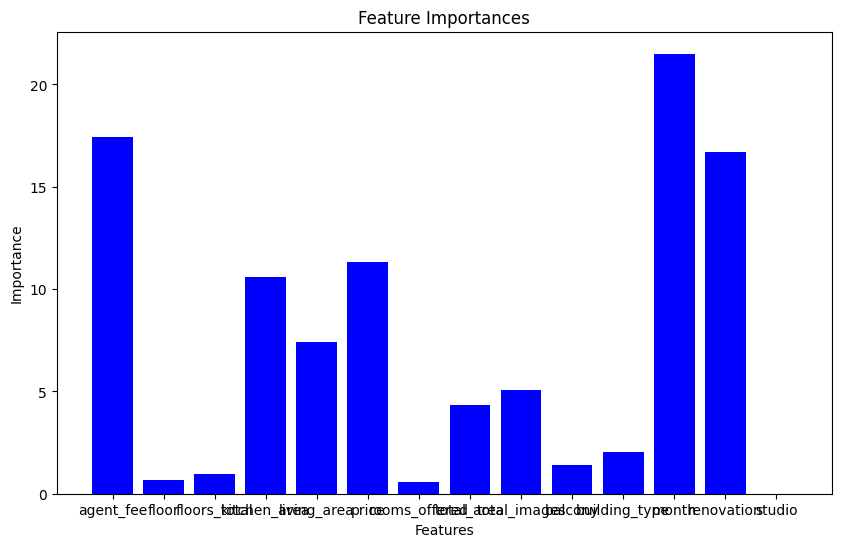

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(fichi31['cols'], fichi31['nums'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
fichi1 = pd.DataFrame({
    'cols': X_train[num_features].columns,
    'nums': model1.feature_importances_

})

fichi1

,cols,nums
0,agent_fee,11.348508
1,floor,1.596878
2,floors_total,1.999433
3,kitchen_area,27.530550
4,living_area,22.739152
5,price,19.233266
6,rooms_offered,1.557755
7,total_area,7.845189
8,total_images,6.149270


In [ ]:
mae1_before = mean_absolute_error(y_test, model1.predict(X_test[num_features]))
mae32_before = mean_absolute_error(y_test, model32.predict(X_test))

model321 = CatBoostRegressor(loss_function='MAE', random_seed=0, depth = 5,
                           learning_rate = 0.1, verbose=0, cat_features = ['balcony',
                              'building_type', 'month', 'renovation'] )

important_features1 = fichi1[fichi1['nums'] >= 0.05]['cols']
important_features2 = fichi31[fichi31['nums'] >= 0.05]['cols']

X_train_imp1 = X_train[important_features1]
X_test_imp1 = X_test[important_features1]

X_train_imp2 = X_train[important_features2]
X_test_imp2 = X_test[important_features2]


model1.fit(X_train_imp1, y_train)
model321.fit(X_train_imp2, y_train)


preds1_after = model1.predict(X_test_imp1)
preds2_after = model321.predict(X_test_imp2)

mae1_after = mean_absolute_error(y_test, preds1_after)
mae2_after = mean_absolute_error(y_test, preds2_after)

# Вычисление разности MAE
mae_diff1 = mae1_before - mae1_after
mae_diff2 = mae32_before - mae2_after

print(f'Difference in MAE for Model 1: {mae_diff1}')
print(f'Difference in MAE for Model 2: {mae_diff2}')

0:	learn: 38.4413000	total: 33.5ms	remaining: 33.4s
1:	learn: 38.1788965	total: 81ms	remaining: 40.4s
2:	learn: 37.9416212	total: 111ms	remaining: 36.8s
3:	learn: 37.7465473	total: 142ms	remaining: 35.4s
4:	learn: 37.5500109	total: 175ms	remaining: 34.8s
5:	learn: 37.3670545	total: 208ms	remaining: 34.4s
6:	learn: 37.2014519	total: 242ms	remaining: 34.4s
7:	learn: 37.0536189	total: 274ms	remaining: 34s
8:	learn: 36.9089998	total: 310ms	remaining: 34.1s
9:	learn: 36.7862015	total: 349ms	remaining: 34.5s
10:	learn: 36.6596869	total: 379ms	remaining: 34.1s
11:	learn: 36.5538598	total: 410ms	remaining: 33.8s
12:	learn: 36.4578544	total: 441ms	remaining: 33.5s
13:	learn: 36.3632721	total: 476ms	remaining: 33.5s
14:	learn: 36.2686930	total: 506ms	remaining: 33.2s
15:	learn: 36.1874072	total: 536ms	remaining: 33s
16:	learn: 36.1187329	total: 567ms	remaining: 32.8s
17:	learn: 36.0515674	total: 597ms	remaining: 32.6s
18:	learn: 35.9831472	total: 627ms	remaining: 32.4s
19:	learn: 35.9129481	tota

In [ ]:
X_train_imp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198390 entries, 0 to 198389
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   agent_fee      198390 non-null  float64
 1   floor          198390 non-null  int64  
 2   floors_total   198370 non-null  float64
 3   kitchen_area   198390 non-null  float64
 4   living_area    198390 non-null  float64
 5   price          198390 non-null  int64  
 6   rooms_offered  198390 non-null  int64  
 7   total_area     198390 non-null  float64
 8   total_images   198390 non-null  int64  
 9   balcony        198390 non-null  object 
 10  building_type  198390 non-null  object 
 11  month          198390 non-null  object 
 12  renovation     198390 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 21.2+ MB
